# **SENTIMENT ANALYSIS OF FREEDOM DEPT RELIEF COMPANY**
# **REVIEWS IN TRUSTPILOT WEBSITE**

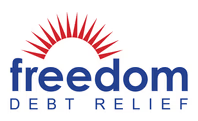

https://www.trustpilot.com/review/freedomdebtrelief.com

#### IMPORT LIBRARIES AND DATASET

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import re

from wordcloud import WordCloud
from collections import Counter

import emoji

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from gensim import corpora, models
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_squared_error, accuracy_score

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/arifaygun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arifaygun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/arifaygun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/arifaygun/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [85]:
df= pd.read_csv('Concatenated_Freedom_Debt_Relief.csv')

### DATA PREPROCESSING

In [86]:
df.sample(10)

,Reviewer Name,Reviews Count,Country Code,Experience Date,Rating,Review Date,Review Title,Review Text,Reply Date,Reply Text
35306,DH,1review,US,"July 17, 2021",5,"Jul 17, 2021",I was drowning in deth,I was drowning in deth. Talked to a representa...,"Reply from Freedom Debt ReliefJul 17, 2021","DH, we appreciate you taking the time to leave..."
37254,Gary Baumgarten,1review,US,"January 29, 2021",5,"Jan 29, 2021",Good,The person I spoke with was very helpful and I...,"Reply from Freedom Debt ReliefJan 29, 2021","Gary, we really appreciate your comments in re..."
31893,Daryle,2reviews,US,"June 17, 2018",5,"Jun 17, 2018",Enrollment process was very easy and…,Enrollment process was very easy and the staff...,"Reply from Freedom Debt ReliefJun 27, 2018",Thank you for your great review! We appreciate...
37029,CYNTHIA LELAND,2reviews,US,"February 12, 2021",5,"Feb 12, 2021",I had a question about a sister company…,I had a question about a sister company of FDR...,"Reply from Freedom Debt ReliefFeb 18, 2021","Hello Cynthia, thank you for taking the time t..."
27128,Minerva,1review,US,"June 10, 2016",5,"Jun 10, 2016",Freedom Debt Relief is TERRIFIC!,From start to finish Freedom Debt Relief's gui...,"Reply from Freedom Debt ReliefAug 15, 2020","Minerva, we appreciate you taking the time to ..."
25100,HARRY SIMMONS,2reviews,US,"October 18, 2017",4,"Oct 18, 2017",Was not sure at first,Was not sure at first. My Agent was very knowl...,"Reply from Freedom Debt ReliefFeb 6, 2019","Dear Harry,We appreciate your positive feedbac..."
17040,Susana Rivera,1review,US,"April 19, 2020",5,"Apr 19, 2020",They have done exactly what they said…,They have done exactly what they said they wou...,"Reply from Freedom Debt ReliefApr 21, 2020","Susana, we appreciate your amazing feedback! W..."
26275,Richard,3reviews,US,"June 18, 2017",5,"Jun 18, 2017",Low Stress Level!,I really like the low stress level after agree...,"Reply from Freedom Debt ReliefJul 13, 2017",Thank you for your positive review! We look fo...
36957,Charlotte Eure,1review,US,"February 17, 2021",5,"Feb 17, 2021",Thanks,Thanks! I have been sooo relieved by FDR actio...,"Reply from Freedom Debt ReliefUpdated Feb 18, ...","Charlotte, we appreciate your amazing feedback..."
29882,John Carbary,3reviews,US,"August 29, 2018",5,"Aug 29, 2018",Always polite and helpful great service.,NaN,"Reply from Freedom Debt ReliefSep 1, 2018",Thank you so much! We are thrilled to receive ...


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39078 entries, 0 to 39077
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Reviewer Name    39068 non-null  object
 1   Reviews Count    39078 non-null  object
 2   Country Code     39078 non-null  object
 3   Experience Date  39078 non-null  object
 4   Rating           39078 non-null  int64 
 5   Review Date      39078 non-null  object
 6   Review Title     39074 non-null  object
 7   Review Text      34241 non-null  object
 8   Reply Date       37731 non-null  object
 9   Reply Text       37731 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.0+ MB


In [88]:
# Remove "review" and "reviews" from the values in the "Reviews Count" column
df['Reviews Count'] = df['Reviews Count'].str.replace('reviews', '').str.replace('review', '')

In [89]:
# Convert the "Reply Date" column to a string data type
df['Reply Date'] = df['Reply Date'].astype(str)

# Remove "Reply from Freedom Debt Relief" from the "Reply Date" column in the existing DataFrame
df['Reply Date'] = df['Reply Date'].str.replace("Reply from Freedom Debt Relief", "")

In [90]:
# Convert 'Experience Date', 'Review Date', 'Reply Date' columns to date
df[['Experience Date', 'Review Date', 'Reply Date']] = df[['Experience Date', 'Review Date', 'Reply Date']].apply(pd.to_datetime, errors='coerce')

# Convert "Reviews Count" column to integer
df['Reviews Count'] = pd.to_numeric(df['Reviews Count'], errors='coerce').astype('Int64')

In [91]:
df.sample(10)

,Reviewer Name,Reviews Count,Country Code,Experience Date,Rating,Review Date,Review Title,Review Text,Reply Date,Reply Text
31081,Evanell Roberts,1,US,2018-07-23,5,2018-07-23,Just getting Started,Just getting Started. I have just enrolled an...,2018-08-01,Thank you for your great review! We appreciate...
9130,Shamwatti Sukhu,1,US,2022-06-20,5,2022-06-20,Your service is very professional and I…,Your service is very professional and I am ver...,2022-06-21,"Thank you for your lovely review, Shamwatti. I..."
7673,Khalilah Stubbs,1,US,2023-01-27,5,2023-01-27,This has been a smoothe transition and…,This has been a smoothe transition and I never...,2023-01-30,"That's amazing to hear, Khalilah! Making sure ..."
34066,Elizabeth,2,US,2018-03-29,4,2018-03-29,I had one creditor negotiate so far and…,I had one creditor negotiate so far and that t...,2018-03-29,Thank you for your positive review! We look fo...
1370,Dejah Reyes,2,US,2019-10-03,5,2019-10-03,No lies,It starts off slow but what they promise you i...,2019-10-03,That is wonderful that you are pleased with yo...
19232,Dionne Wimberly,1,US,2020-01-18,5,2020-01-18,Thank you 😊,Thank you so much for helping me with my debt 😀,2020-01-26,"Dionne, it's our pleasure to be able to provid..."
30388,Paul Visentine,1,US,2018-08-15,5,2018-08-15,I have only had positive experiences…,I have only had positive experiences with cust...,2018-08-15,Thank you for your positive review! We look fo...
26048,David,1,US,2017-07-19,3,2017-07-19,Your fees were never full explained and …,Your fees were never full explained and should...,2017-08-14,Thank you for your feedback! Most clients comp...
32317,Brian Davenport,1,US,2018-05-30,5,2018-05-30,Very helpful frendly and professional,Very helpful frendly and professional. Made me...,2018-06-02,We appreciate the positive review! Thank you f...
37143,Ronna,3,US,2021-02-05,5,2021-02-05,I had to change my email address and…,I had to change my email address and was able ...,2021-02-08,"We're happy to help! Thank you, Ronna, for al..."


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39078 entries, 0 to 39077
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Reviewer Name    39068 non-null  object        
 1   Reviews Count    39078 non-null  Int64         
 2   Country Code     39078 non-null  object        
 3   Experience Date  39078 non-null  datetime64[ns]
 4   Rating           39078 non-null  int64         
 5   Review Date      38287 non-null  datetime64[ns]
 6   Review Title     39074 non-null  object        
 7   Review Text      34241 non-null  object        
 8   Reply Date       37394 non-null  datetime64[ns]
 9   Reply Text       37731 non-null  object        
dtypes: Int64(1), datetime64[ns](3), int64(1), object(5)
memory usage: 3.0+ MB


In [93]:
missing_values = df.isna().sum()

print(missing_values)

Reviewer Name        10
Reviews Count         0
Country Code          0
Experience Date       0
Rating                0
Review Date         791
Review Title          4
Review Text        4837
Reply Date         1684
Reply Text         1347
dtype: int64


**Drop Unnecessary 'Reviewer Name' Column**

In [94]:
df = df.drop(['Reviewer Name'], axis=1)

#### MISSING & UNIQUE VALUES

**Missing Values**

In [95]:
# Drop rows with missing values in specific columns
df.dropna(subset=['Experience Date', 'Rating', 'Review Date', 'Review Title'], inplace=True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38283 entries, 0 to 39077
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Reviews Count    38283 non-null  Int64         
 1   Country Code     38283 non-null  object        
 2   Experience Date  38283 non-null  datetime64[ns]
 3   Rating           38283 non-null  int64         
 4   Review Date      38283 non-null  datetime64[ns]
 5   Review Title     38283 non-null  object        
 6   Review Text      33462 non-null  object        
 7   Reply Date       36709 non-null  datetime64[ns]
 8   Reply Text       36961 non-null  object        
dtypes: Int64(1), datetime64[ns](3), int64(1), object(4)
memory usage: 3.0+ MB


**Unique Values**

In [97]:
unique_value_counts = df.nunique()

print(unique_value_counts)

Reviews Count         31
Country Code          57
Experience Date     2820
Rating                 5
Review Date         2835
Review Title       32236
Review Text        33379
Reply Date          1634
Reply Text         27800
dtype: int64


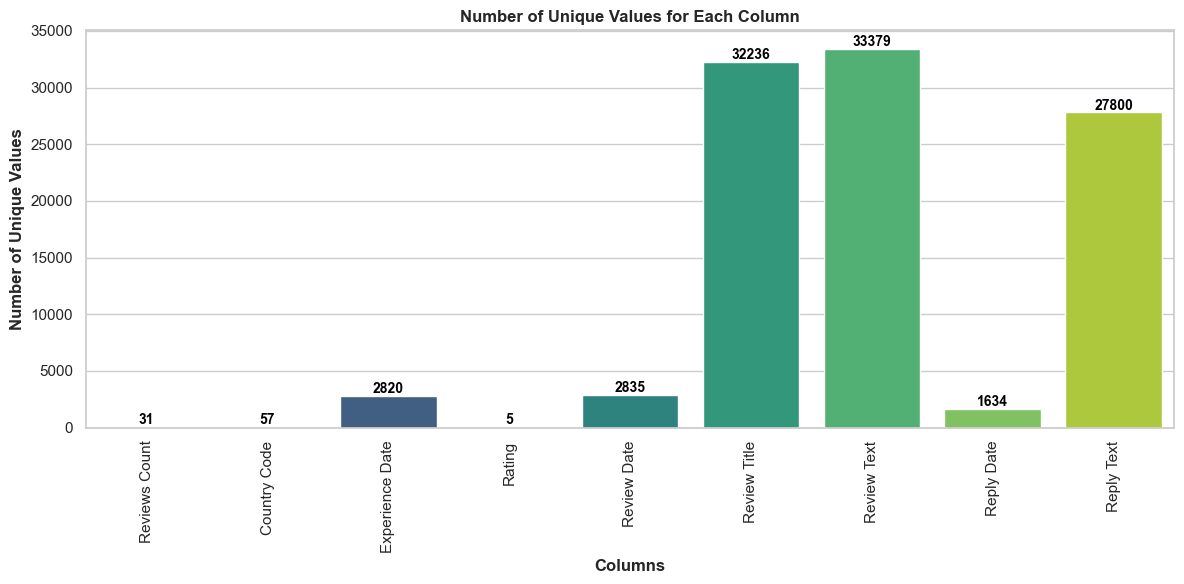

In [98]:
unique_value_counts = df.nunique()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=unique_value_counts.index, y=unique_value_counts.values, hue=unique_value_counts.index, legend=False, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Columns', weight='bold')
plt.ylabel('Number of Unique Values', weight='bold')
plt.title('Number of Unique Values for Each Column', weight='bold')
plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', weight='bold', xytext=(0, 5),
                textcoords='offset points')

plt.show()


##### Step 2: Descriptive Statistics

In [99]:
# Basic statistics
numeric_stats = df[['Reviews Count', 'Rating']].describe()
numeric_stats

,Reviews Count,Rating
count,38283.0,38283.000000
mean,1.649401,4.613849
std,1.403834,0.900698
min,1.0,1.000000
25%,1.0,5.000000
50%,1.0,5.000000
75%,2.0,5.000000
max,43.0,5.000000


##### Step 3: Data Visualization

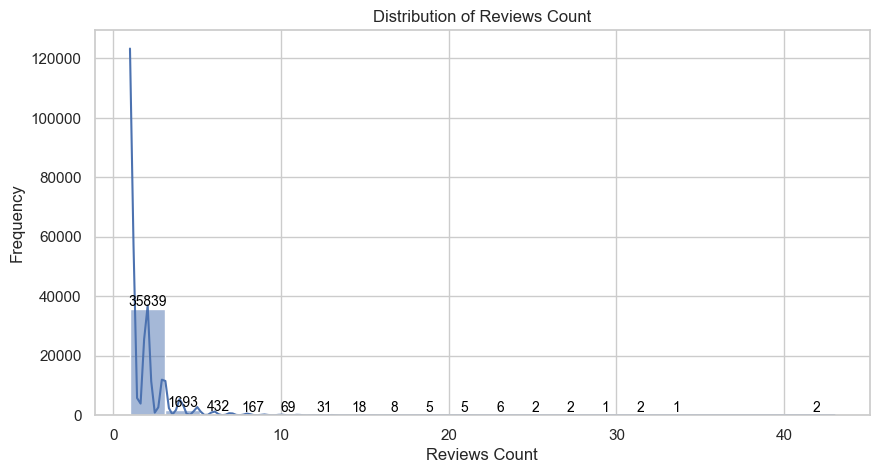

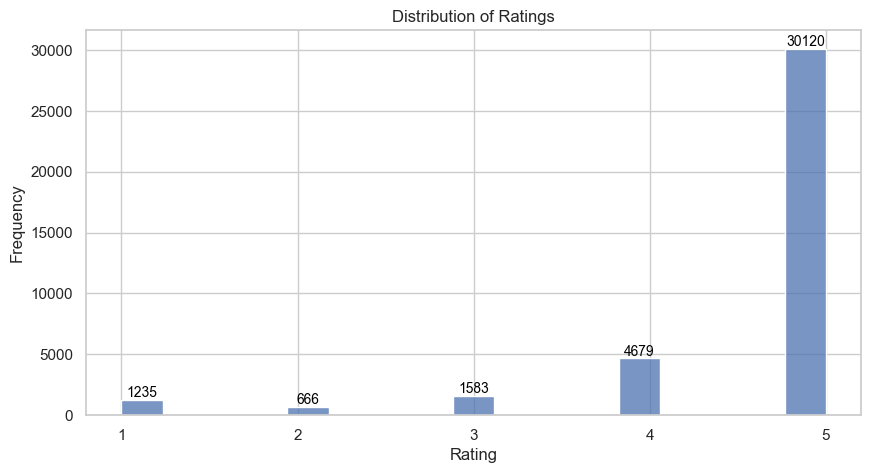

In [100]:
# Numeric data visualization
plt.figure(figsize=(10, 5))
ax1 = sns.histplot(df['Reviews Count'], bins=20, kde=True)
plt.title('Distribution of Reviews Count')
plt.xlabel('Reviews Count')
plt.ylabel('Frequency')


for p in ax1.patches:
    if p.get_height() > 0:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.show()

plt.figure(figsize=(10, 5))
ax2 = sns.histplot(x='Rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.xticks(range(1, 6))

for p in ax2.patches:
    if p.get_height() > 0:
        ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.show()

#### Step 4: Time Series Analysis

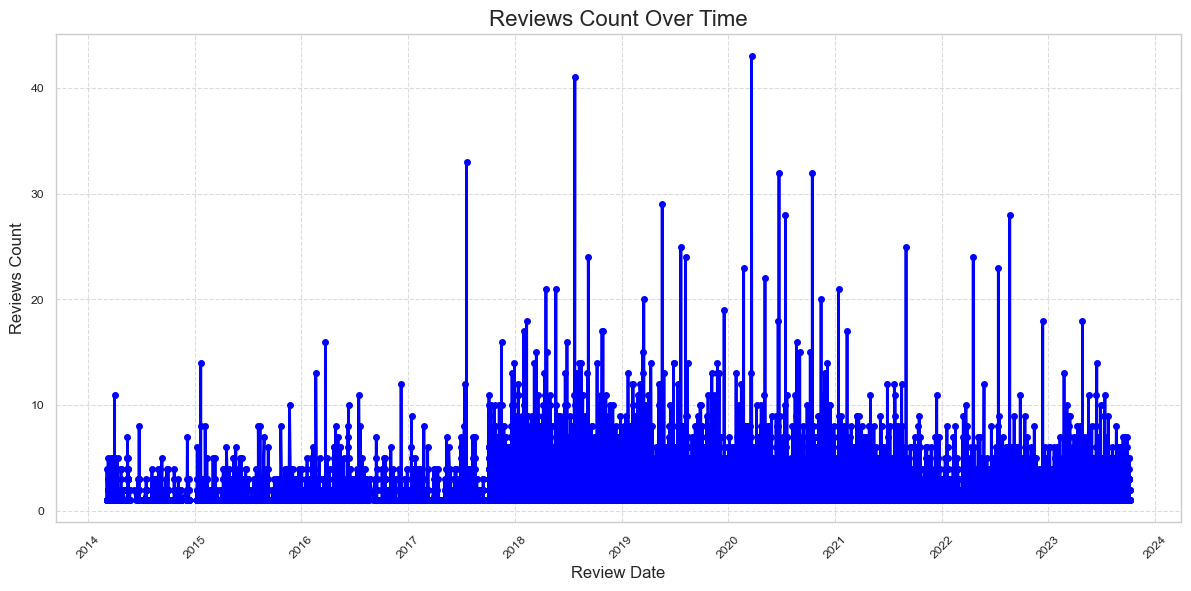

In [101]:
# Set the style and context for the plot
sns.set_style("whitegrid")
sns.set_context("paper")

# Create a figure and axis
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Plot the time series data
ax.plot(df['Review Date'], df['Reviews Count'], color='blue', marker='o', linestyle='-', linewidth=2, markersize=4)

# Add title and labels
plt.title('Reviews Count Over Time', fontsize=16)
plt.xlabel('Review Date', fontsize=12)
plt.ylabel('Reviews Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.7)

# Annotate points where Reviews Count is greater than 50
for index, row in df.iterrows():
    if row['Reviews Count'] > 50:
        ax.annotate(f'{int(row["Reviews Count"])}', (row['Review Date'], row['Reviews Count']),
                    ha='center', va='bottom', fontsize=9, color='red')

# Show the plot
plt.tight_layout()
plt.show()

#### Step 5: Text Analysis

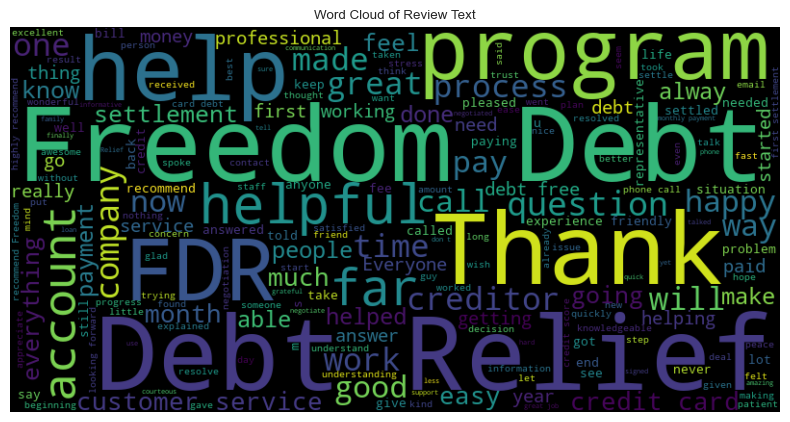

In [102]:
# Word cloud for Review Text

wordcloud = WordCloud(width=800, height=400).generate(' '.join(df['Review Text'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Text')
plt.show()

#### Step 6: Correlation Analysis

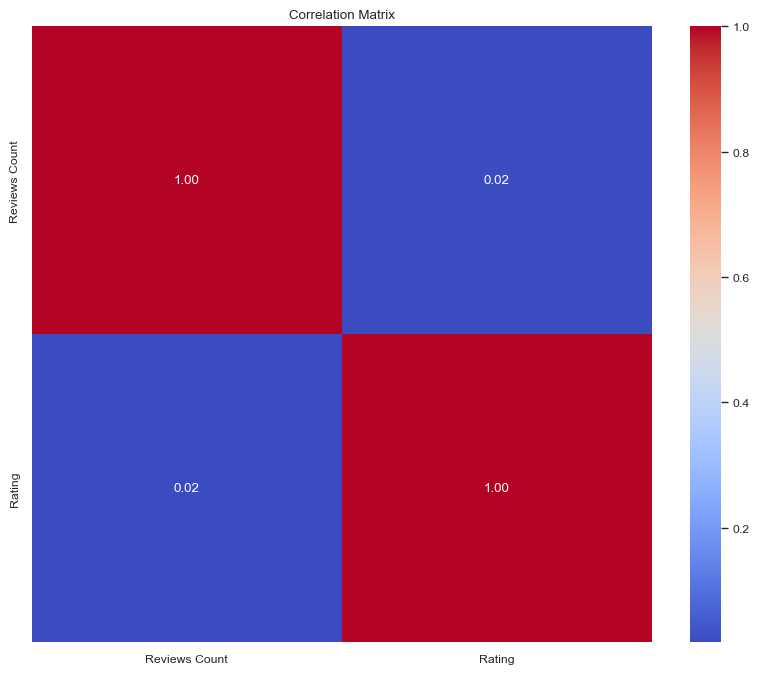

In [103]:
# Exclude non-numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

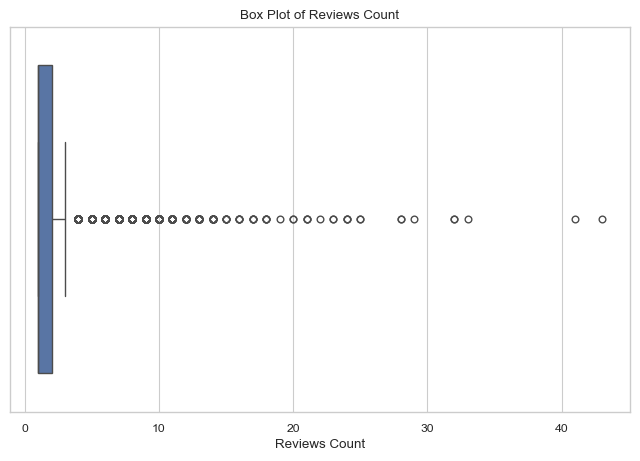

In [104]:
# Box plot for Reviews Count
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Reviews Count'])
plt.title('Box Plot of Reviews Count')
plt.xlabel('Reviews Count')
plt.show()

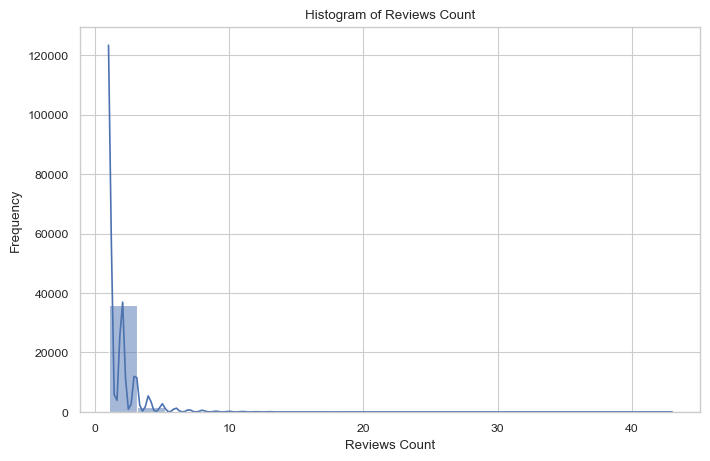

In [105]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Reviews Count'], bins=20, kde=True)
plt.title('Histogram of Reviews Count')
plt.xlabel('Reviews Count')
plt.ylabel('Frequency')
plt.show()

### Time-Series Analysis:

a. Time-Series Plot: Create time-series plots to visualize how a particular variable changes over time. For instance, you can plot the trend of review counts or ratings over time.

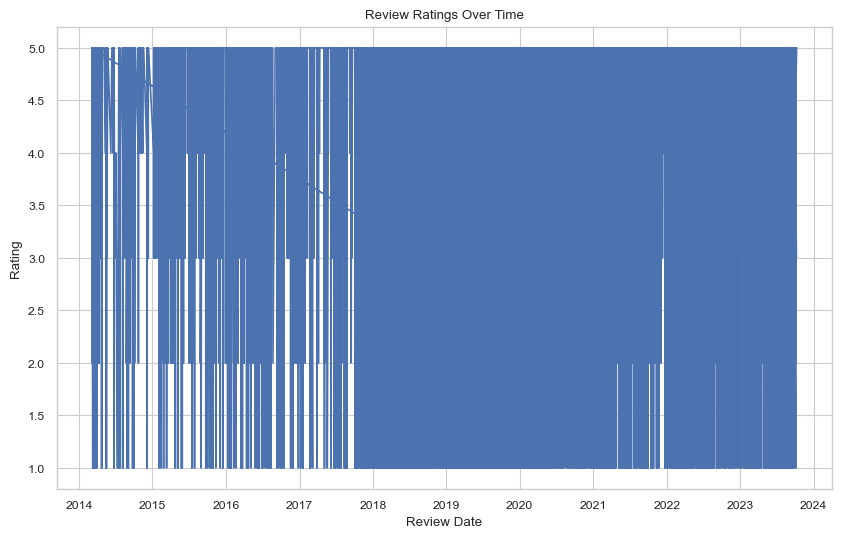

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(df['Review Date'], df['Rating'])
plt.title('Review Ratings Over Time')
plt.xlabel('Review Date')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


b. Time-Series Decomposition: Decompose time series data into trend, seasonal, and residual components to identify patterns and anomalies.

Trend Component Summary:
count    37919.000000
mean         4.613775
std          0.083038
min          4.347945
25%          4.572603
50%          4.627397
75%          4.671233
max          4.810959
Name: trend, dtype: float64


Seasonal Component Summary:
count    38283.000000
mean        -0.000007
std          0.089478
min         -0.316086
25%         -0.056339
50%          0.010573
75%          0.068266
max          0.203829
Name: seasonal, dtype: float64


Residual Component Summary:
count    37919.000000
mean         0.000149
std          0.891403
min         -3.888734
25%          0.195644
50%          0.330048
75%          0.428692
max          0.883157
Name: resid, dtype: float64


Observed Summary:
count    38283.000000
mean         4.613849
std          0.900698
min          1.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64




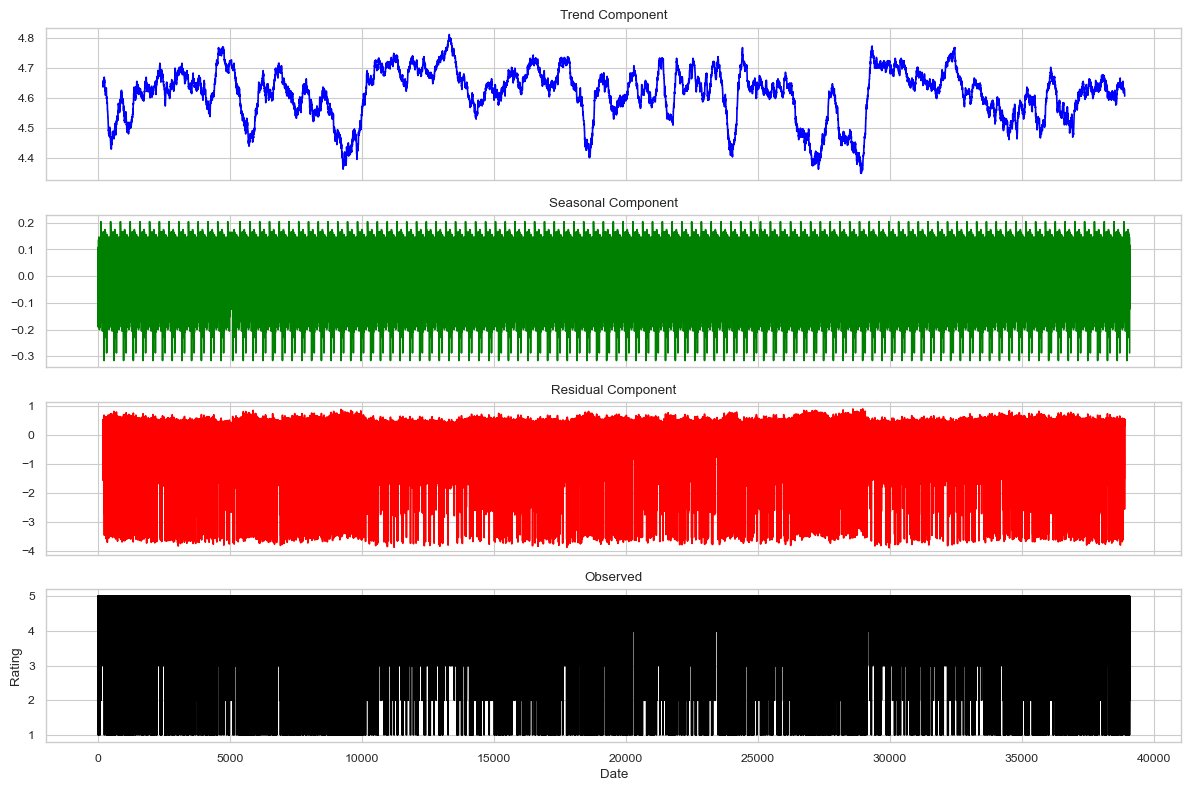

In [107]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

# Perform seasonal decomposition
result = seasonal_decompose(df['Rating'], model='additive', period=365)

# Create a figure with a grid layout
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

# Custom color palette for better readability
colors = ['blue', 'green', 'red', 'black']

# Titles for each component
titles = ['Trend Component', 'Seasonal Component', 'Residual Component', 'Observed']

for i, (ax, title, color) in enumerate(zip(axes, titles, colors)):
    # Customize the appearance of each component
    result.__getattribute__('trend' if i == 0 else ['seasonal', 'resid', 'observed'][i-1]).plot(ax=ax, title=title, color=color, legend=False)
    ax.set_ylabel('Rating' if i == 3 else '')  # Label only the last subplot

# Set common x-axis label
plt.xlabel('Date')

# Fine-tune the layout
plt.tight_layout()

# Print details of each component
for title, component in zip(titles, [result.trend, result.seasonal, result.resid, result.observed]):
    print(f"{title} Summary:")
    print(component.describe())
    print("\n")

# Show the plot
plt.show()


### Aggregation and Grouping:

a. Group Data by Time Period: Aggregate data by specific time intervals (e.g., monthly, quarterly) to analyze trends and patterns.

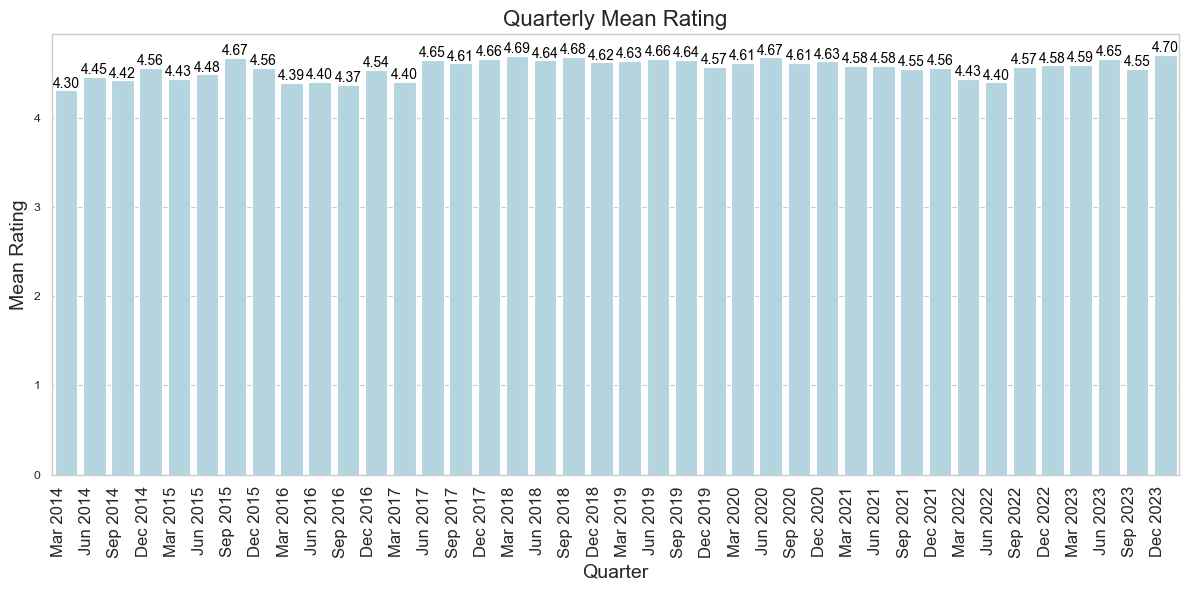

Quarterly Mean Rating:
               Rating
Review Date          
2014Q1       4.303318
2014Q2       4.453287
2014Q3       4.417178
2014Q4       4.556701
2015Q1       4.433121
2015Q2       4.484694
2015Q3       4.665138
2015Q4       4.557214
2016Q1       4.387560
2016Q2       4.402985
2016Q3       4.367742
2016Q4       4.535088
2017Q1       4.396739
2017Q2       4.650177
2017Q3       4.608355
2017Q4       4.657696
2018Q1       4.693263
2018Q2       4.640033
2018Q3       4.682168
2018Q4       4.618690
2019Q1       4.633946
2019Q2       4.656013
2019Q3       4.644314
2019Q4       4.566324
2020Q1       4.608592
2020Q2       4.674251
2020Q3       4.612559
2020Q4       4.629204
2021Q1       4.579634
2021Q2       4.581959
2021Q3       4.545792
2021Q4       4.558140
2022Q1       4.434498
2022Q2       4.395210
2022Q3       4.568289
2022Q4       4.584249
2023Q1       4.587261
2023Q2       4.653887
2023Q3       4.547468
2023Q4       4.698630


In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by quarter and calculate the mean rating for each quarter
quarterly_mean_rating = df.groupby(df['Review Date'].dt.to_period('Q')).agg({'Rating': 'mean'})

# Create a bar plot for quarterly mean rating
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=quarterly_mean_rating.index.strftime('%b %Y'), y=quarterly_mean_rating['Rating'], color='lightblue')

# Add labels and titles
plt.title('Quarterly Mean Rating', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Mean Rating', fontsize=14)

# Rotate x-axis labels for readability (rotate 90 degrees)
plt.xticks(rotation=90, ha="right", fontsize=12)

# Display data values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

# Print information about the quarterly mean rating
print("Quarterly Mean Rating:")
print(quarterly_mean_rating)


### Time-Related Calculations:

a. Calculate Time Difference: Calculate the time difference between two date columns. For instance, you can calculate the response time by subtracting the review date from the reply date.

In [109]:
df['Response Time'] = df['Reply Date'] - df['Review Date']

b. Extract Date Components: Extract specific components from the date, such as year, month, day, or weekday.

In [110]:
df['Year'] = df['Review Date'].dt.year
df['Month'] = df['Review Date'].dt.month
df['Day'] = df['Review Date'].dt.day
df['Weekday'] = df['Review Date'].dt.day_name()

### Statistical Analysis:

a. Calculate summary statistics for different time periods, such as the mean rating for each year or month.

In [111]:
# Mean rating by year
mean_rating_by_year = df.groupby(df['Review Date'].dt.year)['Rating'].mean()

a. Calculate summary statistics for different time periods, such as the mean rating for each year or month:

In [112]:
# Calculate the mean rating by year
mean_rating_by_year = df.groupby(df['Review Date'].dt.year)['Rating'].mean()

# Calculate the mean rating by month
mean_rating_by_month = df.groupby(df['Review Date'].dt.month)['Rating'].mean()

# Print the results
print("Mean Rating by Year:")
print(mean_rating_by_year)

print("Mean Rating by Month:")
print(mean_rating_by_month)


Mean Rating by Year:
Review Date
2014    4.417105
2015    4.544041
2016    4.427907
2017    4.639979
2018    4.662690
2019    4.626255
2020    4.633282
2021    4.569489
2022    4.503268
2023    4.599271
Name: Rating, dtype: float64
Mean Rating by Month:
Review Date
1     4.620182
2     4.587039
3     4.608971
4     4.605054
5     4.642208
6     4.605485
7     4.611056
8     4.624848
9     4.622603
10    4.589716
11    4.600492
12    4.657104
Name: Rating, dtype: float64


Visualization for Mean Rating by Year:

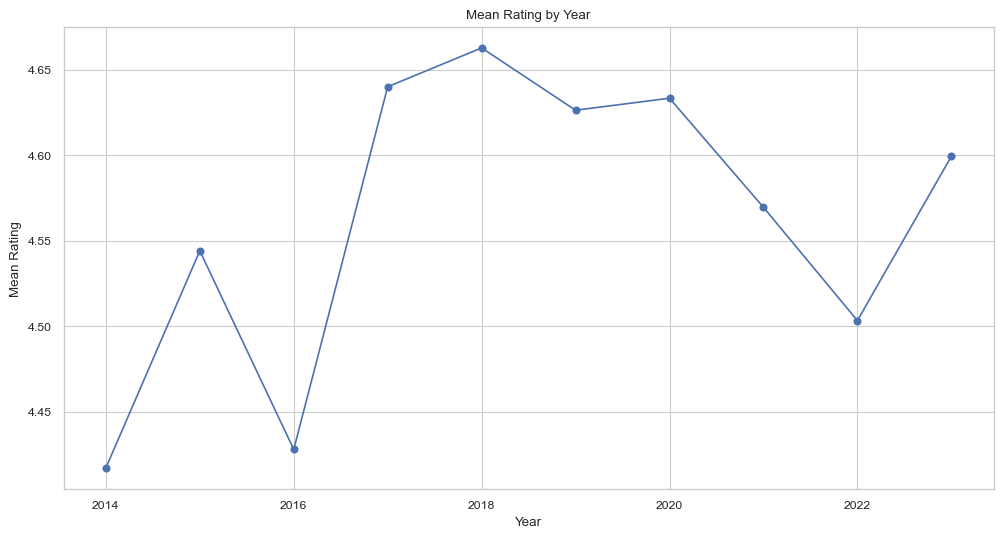

Mean Rating by Year:
Review Date
2014    4.417105
2015    4.544041
2016    4.427907
2017    4.639979
2018    4.662690
2019    4.626255
2020    4.633282
2021    4.569489
2022    4.503268
2023    4.599271
Name: Rating, dtype: float64


In [113]:
import matplotlib.pyplot as plt

# Calculate the mean rating by year
mean_rating_by_year = df.groupby(df['Review Date'].dt.year)['Rating'].mean()

# Plot the mean rating by year
plt.figure(figsize=(12, 6))
plt.plot(mean_rating_by_year.index, mean_rating_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Mean Rating by Year')
plt.xlabel('Year')
plt.ylabel('Mean Rating')
plt.grid(True)

# Show the plot
plt.show()

# Print information about the mean rating by year
print("Mean Rating by Year:")
print(mean_rating_by_year)


Visualization for Mean Rating by Month:

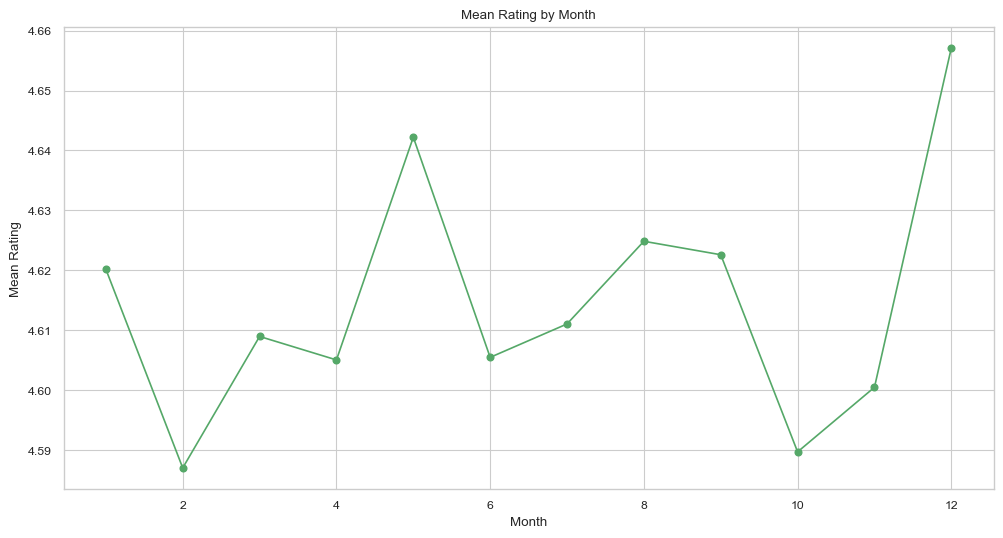

Mean Rating by Month:
Review Date
1     4.620182
2     4.587039
3     4.608971
4     4.605054
5     4.642208
6     4.605485
7     4.611056
8     4.624848
9     4.622603
10    4.589716
11    4.600492
12    4.657104
Name: Rating, dtype: float64


In [114]:
# Calculate the mean rating by month
mean_rating_by_month = df.groupby(df['Review Date'].dt.month)['Rating'].mean()

# Plot the mean rating by month
plt.figure(figsize=(12, 6))
mean_rating_by_month.plot(kind='line', marker='o', color='g')
plt.title('Mean Rating by Month')
plt.xlabel('Month')
plt.ylabel('Mean Rating')
plt.grid(True)

# Show the plot
plt.show()

# Print information about the mean rating by month
print("Mean Rating by Month:")
print(mean_rating_by_month)


Histogram of Ratings:

A histogram will show the distribution of ratings. You can see how many ratings fall into each category

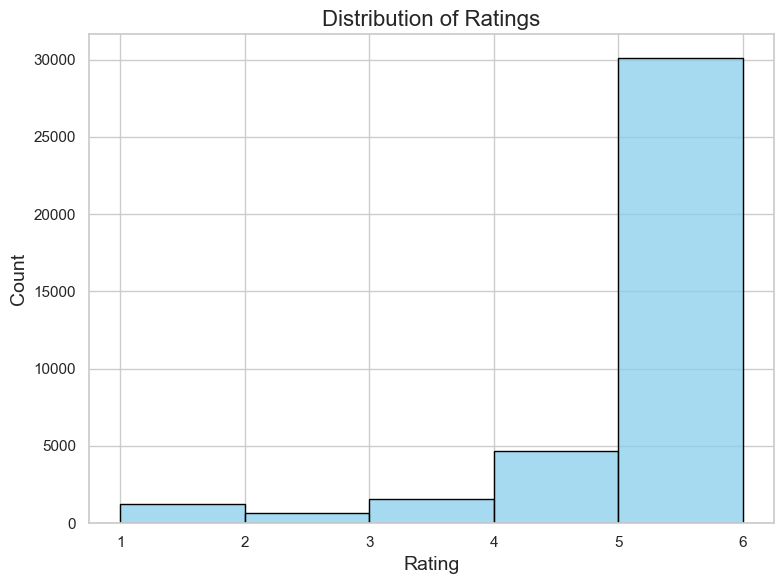

Distribution of Ratings:
Rating
1     1235
2      666
3     1583
4     4679
5    30120
Name: count, dtype: int64


In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a histogram of ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=[1, 2, 3, 4, 5, 6], kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

# Print information about the distribution of ratings
rating_counts = df['Rating'].value_counts().sort_index()
print("Distribution of Ratings:")
print(rating_counts)


### Box Plot of Ratings:

A box plot provides a summary of the distribution of ratings, including median, quartiles, and potential outliers.

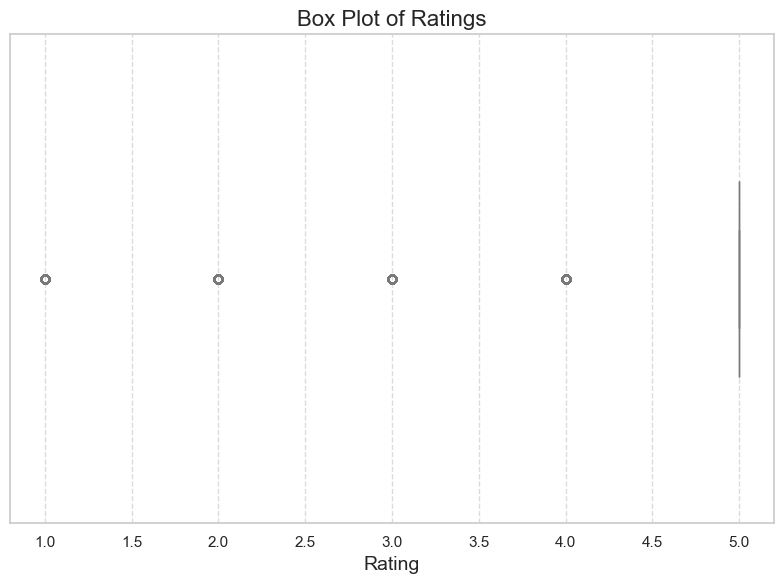

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a box plot of ratings
plt.figure(figsize=(8, 6))
sns.boxplot(x='Rating', data=df, orient='h', color='lightblue', width=0.4)
plt.title('Box Plot of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


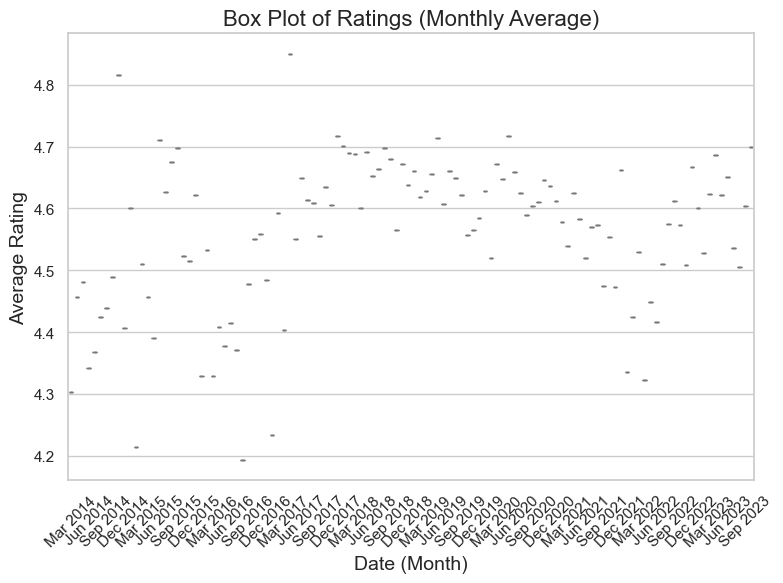

Monthly Average Ratings (Sampled):


,Date,Average Rating
0,Mar 2014,4.303318
1,Apr 2014,4.456140
2,May 2014,4.481752
3,Jun 2014,4.342105
4,Jul 2014,4.368421
5,Aug 2014,4.423729
6,Sep 2014,4.439394
7,Oct 2014,4.488372
8,Nov 2014,4.814815
9,Dec 2014,4.407407


In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Downsample the data by averaging ratings on a monthly basis
monthly_ratings = df.resample('M', on='Review Date')['Rating'].mean().dropna()

# Create a DataFrame from the downsampled ratings
monthly_ratings_df = pd.DataFrame({'Date': monthly_ratings.index.to_period('M').strftime('%b %Y'), 'Average Rating': monthly_ratings.values})

# Set a Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a box plot of downsampled ratings
plt.figure(figsize=(8, 6))
sns.boxplot(x=monthly_ratings_df['Date'], y=monthly_ratings_df['Average Rating'], color='lightblue')
plt.title('Box Plot of Ratings (Monthly Average)', fontsize=16)
plt.xlabel('Date (Month)', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)

# Show only every nth label on the x-axis (e.g., every 3rd label)
n = 3
plt.xticks(range(0, len(monthly_ratings_df), n), monthly_ratings_df['Date'][::n], rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

# Print the DataFrame
print("Monthly Average Ratings (Sampled):")
monthly_ratings_df.head(20)


### Time Series Plot of Ratings Over Time:

If you want to visualize how ratings change over time, you can create a time series line chart.

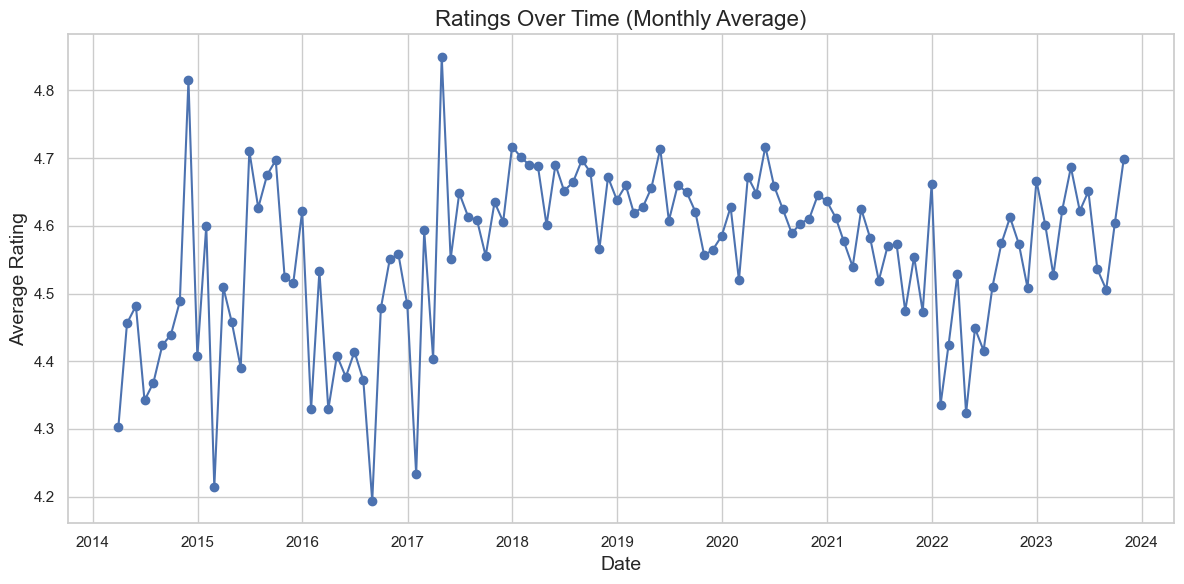

Monthly Average Ratings:


Review Date
2014-03-31    4.303318
2014-04-30    4.456140
2014-05-31    4.481752
2014-06-30    4.342105
2014-07-31    4.368421
2014-08-31    4.423729
2014-09-30    4.439394
2014-10-31    4.488372
2014-11-30    4.814815
2014-12-31    4.407407
2015-01-31    4.600000
2015-02-28    4.214286
2015-03-31    4.509804
2015-04-30    4.457447
2015-05-31    4.390625
2015-06-30    4.710526
2015-07-31    4.626667
2015-08-31    4.675325
2015-09-30    4.696970
2015-10-31    4.523810
Freq: M, Name: Rating, dtype: float64

In [118]:
import matplotlib.pyplot as plt
import pandas as pd

# Downsample the data by averaging ratings by month
monthly_ratings = df.resample('M', on='Review Date')['Rating'].mean().dropna()

# Create a time series plot of downsampled ratings
plt.figure(figsize=(12, 6))
plt.plot(monthly_ratings.index, monthly_ratings.values, marker='o', linestyle='-', color='b')
plt.title('Ratings Over Time (Monthly Average)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Print information about the downsampled ratings
print("Monthly Average Ratings:")
monthly_ratings.head(20)


## NLP

#### Concatenate Text Columns

In [119]:
columns_to_concat = ['Review Title', 'Review Text']

# Concatenate the selected columns into a new column 'Concatenated_Text'
df['Concatenated_Text'] = df[columns_to_concat].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

#### Text Preprocessing

Before performing NLP tasks, it's important to preprocess the text data, which typically involves removing stopwords, punctuation, and converting text to lowercase.

In [120]:
def preprocess_text(text):
    if isinstance(text, str):  # Check if the value is a string
        # Remove emojis from the text and store them separately
        emojis = [c for c in text if c in emoji.UNICODE_EMOJI]

        # Tokenize the text
        words = word_tokenize(text.lower())

        # Remove stopwords and punctuation
        words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]

        # Lemmatize words
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]

        # Combine words and emojis back into a preprocessed text
        preprocessed_text = ' '.join(words) + ' '.join(emojis)
        return preprocessed_text
    else:
        return ''  # Return an empty string for non-text values (NaN)

In [121]:
def preprocess_text(text):
    if isinstance(text, str):  # Check if the value is a string
        # Remove emojis from the text
        text = re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U0001FB00-\U0001FBFF\U0001FC00-\U0001FCFF\U0001FD00-\U0001FDFF\U0001FE00-\U0001FEFF\U0001FF00-\U0001FFFF]+', '', text)

        # Tokenize the text
        words = word_tokenize(text.lower())

        # Remove stopwords and punctuation
        words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]

        # Lemmatize words
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]

        return ' '.join(words)
    else:
        return ''  # Return an empty string for non-text values (NaN)

In [122]:
df['Cleaned_Concatenated_Text'] = df['Concatenated_Text'].apply(preprocess_text)

In [123]:
# Count the number of items in each text item
df['Text_Item_Count'] = df['Cleaned_Concatenated_Text'].apply(lambda x: len(x.split()))

# Display both the text and the count of text items
text_with_count = df[['Cleaned_Concatenated_Text', 'Text_Item_Count']]

print(text_with_count)

# Calculate the total number of text items across all rows
total_text_items = df['Text_Item_Count'].sum()

# Display the total number of text items
print(f"Total Text Items: {total_text_items}")

                               Cleaned_Concatenated_Text  Text_Item_Count
0                                  working better future                3
1                                                helpful                1
2              polite kind polite kind asked immediately                6
3      great customer service long wait time represen...               20
4      needed answer needed answer question concernin...               17
...                                                  ...              ...
39073  repayment hello reason giving fdr 1 star lates...               23
39074  glad working freedom helping debt starting dig...               17
39075  finally able take deep finally able take deep ...               11
39076  disappointed md recently wanted add old collec...               47
39077  best costumer service ever best costumer servi...               14

[38283 rows x 2 columns]
Total Text Items: 638079


In [124]:
all_words = ' '.join(df['Cleaned_Concatenated_Text']).split()

# Count the occurrences of each word
word_counts = Counter(all_words)

# Sort the word counts in descending order
sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

# Create a DataFrame for the first 50 most common words
word_counts_df = pd.DataFrame(list(sorted_word_counts.items()), columns=['Word', 'Count'])

print(word_counts_df.head(30))

          Word  Count
0         debt  23578
1      freedom  13768
2       relief  10588
3        great   9350
4         help   7492
5      service   6998
6          fdr   6906
7      helpful   6886
8      program   6286
9          far   6250
10       would   6047
11        good   5895
12       thank   5813
13         get   5470
14     company   5433
15      credit   4534
16        time   4449
17     account   4061
18        work   4045
19         one   3968
20    customer   3840
21    question   3766
22       happy   3632
23  experience   3603
24     process   3599
25        call   3553
26  settlement   3516
27   recommend   3282
28        made   3251
29       month   3205


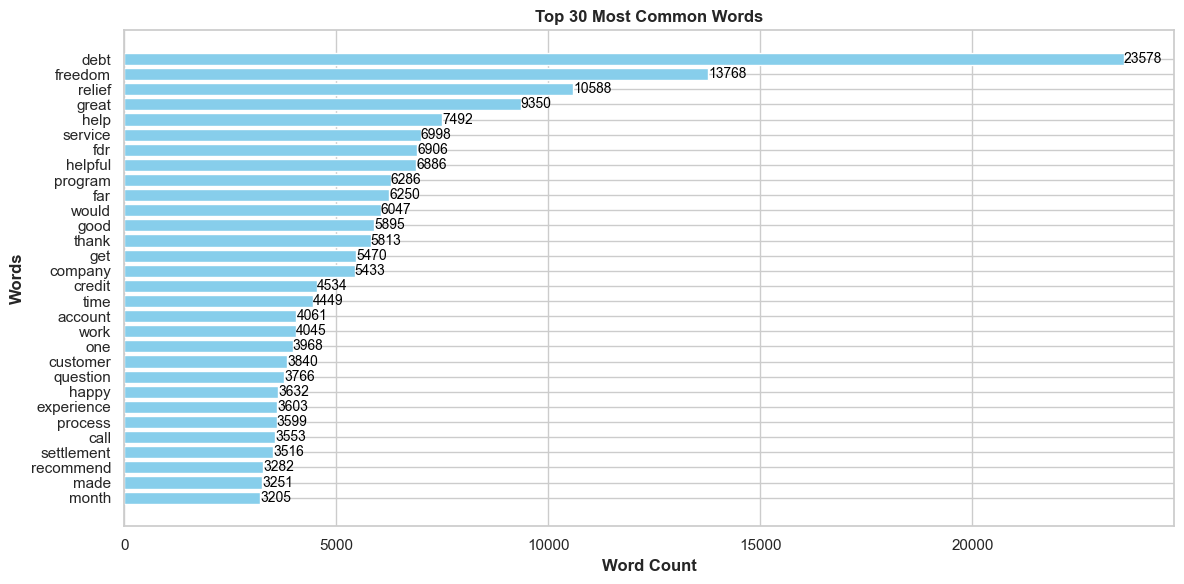

In [125]:
top_n = 30
top_words = list(sorted_word_counts.keys())[:top_n]
top_word_counts = list(sorted_word_counts.values())[:top_n]

plt.figure(figsize=(12, 6))
plt.barh(top_words, top_word_counts, color='skyblue')
plt.xlabel('Word Count', fontweight='bold')
plt.ylabel('Words', fontweight='bold')
plt.title(f'Top {top_n} Most Common Words', fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()

for i, count in enumerate(top_word_counts):
    plt.text(count, i, str(count), va='center', fontsize=10, color='black')

plt.show()

#### Sentiment Analysis

Sentiment analysis helps determine the sentiment (positive, negative, or neutral) of text data. VADER or TextBlob libraries for sentiment analysis were used

In [126]:
def analyze_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores

In [127]:
# Apply sentiment analysis to the 'Cleaned_Concatenated_Text' column
df['Sentiment_Scores'] = df['Cleaned_Concatenated_Text'].apply(analyze_sentiment)

# Extract the sentiment labels (positive, negative, neutral)
df['Sentiment_Label'] = df['Sentiment_Scores'].apply(lambda x: 'positive' if x['compound'] > 0 else ('negative' if x['compound'] < 0 else 'neutral'))

print("Sentiment Scores:")
print(df['Sentiment_Scores'])

print("\nSentiment Labels:")
print(df['Sentiment_Label'])

Sentiment Scores:
0        {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...
1        {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
2        {'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compou...
3        {'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compou...
4        {'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'comp...
                               ...                        
39073    {'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'comp...
39074    {'neg': 0.179, 'neu': 0.394, 'pos': 0.427, 'co...
39075    {'neg': 0.0, 'neu': 0.559, 'pos': 0.441, 'comp...
39076    {'neg': 0.112, 'neu': 0.741, 'pos': 0.146, 'co...
39077    {'neg': 0.0, 'neu': 0.405, 'pos': 0.595, 'comp...
Name: Sentiment_Scores, Length: 38283, dtype: object

Sentiment Labels:
0        positive
1        positive
2        positive
3        positive
4        positive
           ...   
39073    positive
39074    positive
39075    positive
39076    positive
39077    positive
Name: Sentiment_Label, Length: 38283, dtype: object


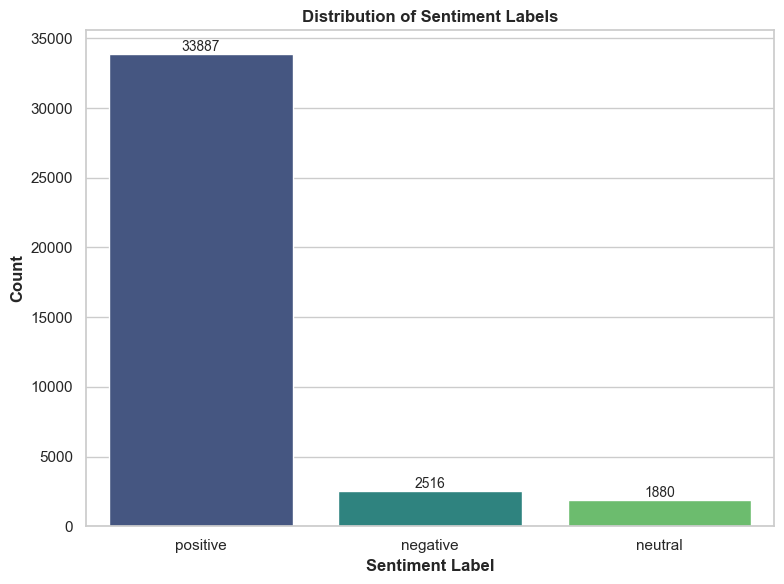

In [128]:
# Get the counts of each sentiment label
sentiment_counts = df['Sentiment_Label'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, hue=sentiment_counts.index, palette='viridis', legend=False)
plt.xlabel('Sentiment Label', weight='bold')
plt.ylabel('Count', weight='bold')
plt.title('Distribution of Sentiment Labels', fontsize=12, weight='bold')
plt.tight_layout()

for i, count in enumerate(sentiment_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

#### Topic Modeling

Topic modeling helps identify the main topics within a collection of documents. Latent Dirichlet Allocation (LDA) topic modeling using the Gensim library were used.

In [129]:
# Tokenize and preprocess text (using the 'Cleaned_Concatenated_Text' column)
tokenized_reviews = [word_tokenize(text) for text in df['Cleaned_Concatenated_Text']]

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

# Train an LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Get topics and associated words
topics = lda_model.print_topics(num_words=5)

# Print the topics
for topic in topics:
    print(topic)


(0, '0.079*"service" + 0.071*"helpful" + 0.043*"customer" + 0.042*"question" + 0.031*"always"')
(1, '0.090*"great" + 0.087*"far" + 0.082*"good" + 0.045*"experience" + 0.035*"happy"')
(2, '0.117*"debt" + 0.075*"freedom" + 0.056*"relief" + 0.030*"help" + 0.022*"thank"')
(3, '0.020*"account" + 0.017*"payment" + 0.016*"month" + 0.015*"one" + 0.015*"credit"')
(4, '0.037*"process" + 0.024*"easy" + 0.019*"made" + 0.018*"everything" + 0.018*"feel"')


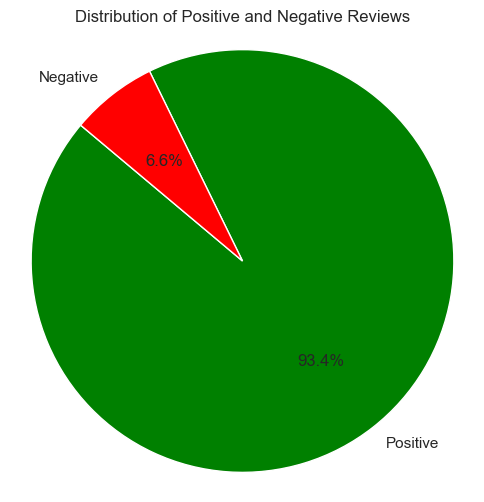

In [130]:
analyzer = SentimentIntensityAnalyzer()

# Define a function to classify reviews as positive, negative, or neutral
def classify_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment classification to the 'Cleaned_Concatenated_Text' column
df['Sentiment_Label'] = df['Cleaned_Concatenated_Text'].apply(classify_sentiment)

# Count the number of positive and negative reviews
positive_reviews_count = len(df[df['Sentiment_Label'] == 'Positive'])
negative_reviews_count = len(df[df['Sentiment_Label'] == 'Negative'])

# Create a pie chart to visualize the distribution of positive and negative reviews
labels = ['Positive', 'Negative']
sizes = [positive_reviews_count, negative_reviews_count]
colors = ['green', 'red']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Positive and Negative Reviews')
plt.axis('equal')

plt.show()

#### Sentiment Trends Over Time

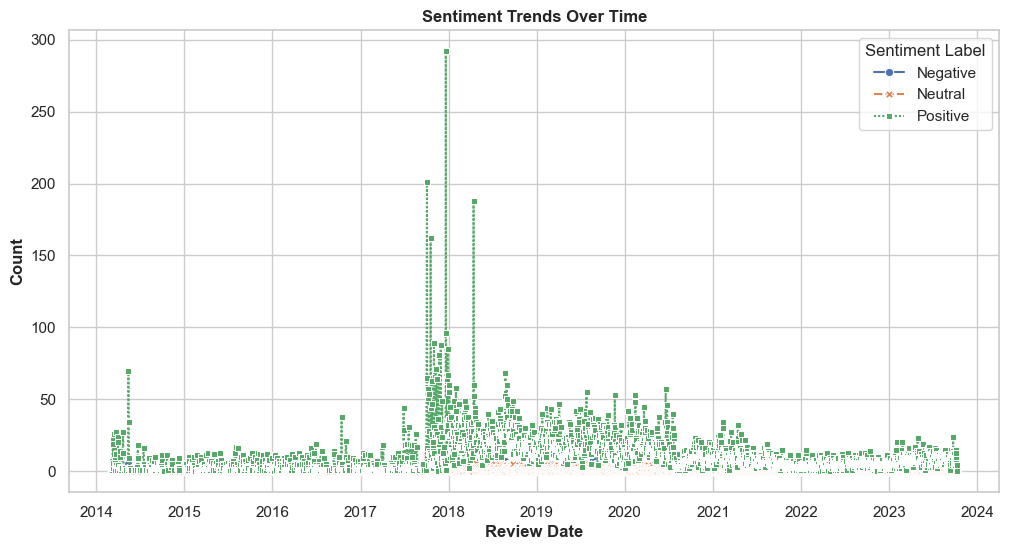

In [131]:
# Group the data by date and sentiment label, and count the occurrences
sentiment_trends = df.groupby(['Review Date', 'Sentiment_Label']).size().unstack(fill_value=0)

# Reset the index to have 'Date' as a column
sentiment_trends.reset_index(inplace=True)

# Set 'Date' column as the index for the DataFrame
sentiment_trends.set_index('Review Date', inplace=True)

# Plot the sentiment trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiment_trends, markers=True)
plt.title('Sentiment Trends Over Time', weight='bold')
plt.xlabel('Review Date', weight='bold')
plt.ylabel('Count', weight='bold')
plt.legend(title='Sentiment Label', loc='upper right')
plt.grid(True)
plt.show()

In [132]:
# Group the data by date and sentiment label, and count the occurrences
sentiment_trends = df.groupby(['Review Date', 'Sentiment_Label']).size().unstack(fill_value=0)

# Reset the index to have 'Date' as a column
sentiment_trends.reset_index(inplace=True)

# Set 'Date' column as the index for the DataFrame
sentiment_trends.set_index('Review Date', inplace=True)

# Filter the DataFrame for only the "Negative" sentiment label
negative_sentiment_trends = sentiment_trends['Negative']

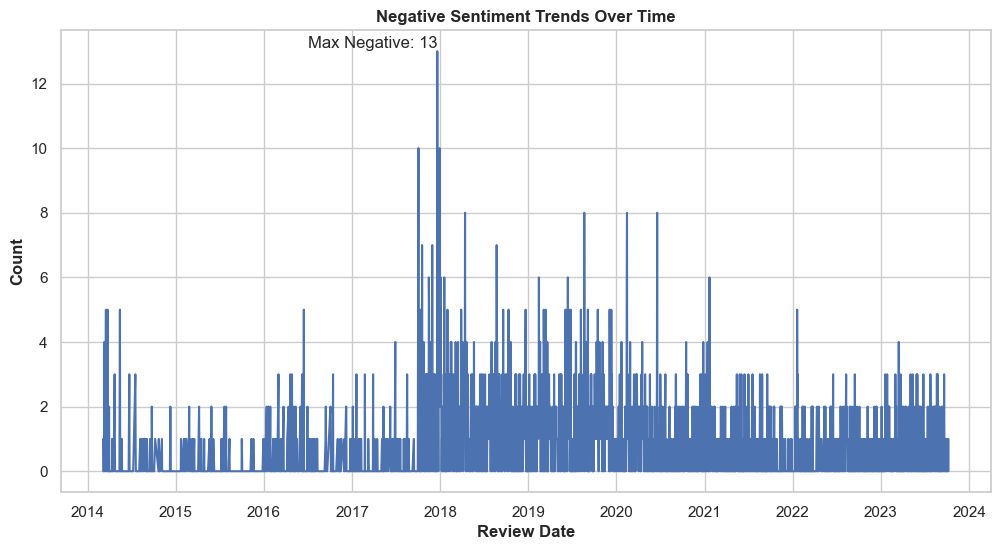

Top Negative Value: 13 on 2017-12-20 00:00:00


In [133]:
# Find the date with the highest negative sentiment count
max_negative_date = negative_sentiment_trends.idxmax()
max_negative_count = negative_sentiment_trends.max()

# Plot the negative sentiment trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=negative_sentiment_trends, markers=True)
plt.title('Negative Sentiment Trends Over Time', weight='bold')
plt.xlabel('Review Date', weight='bold')
plt.ylabel('Count', weight='bold')
plt.grid(True)

# Add text annotation for the top negative value
plt.text(max_negative_date, max_negative_count, f'Max Negative: {max_negative_count}', ha='right', va='bottom', fontsize=12)

plt.show()

# Print the top negative value and date
print(f"Top Negative Value: {max_negative_count} on {max_negative_date}")

#### Machine Learning Model